# Project Penney
---

#### Step 1: Run the Imports

In [230]:
import src.datagen
import src.helpers
import src.processing
import src.visualizations

from importlib import reload
reload(src.datagen)
reload(src.helpers)
reload(src.processing)
reload(src.visualizations)

<module 'src.visualizations' from '/Users/thomasburkett/Library/CloudStorage/OneDrive-William&Mary/Year 3/Spring 2025/DATA 440 A&W/Project-Penney/src/visualizations.py'>

---
#### Step 2: Store our Number of Decks and Seed

In [157]:
# Store variables for testing

num_decks = 1000000
seed = 42

---
#### Step 3: Store the data

In [158]:
# Run the datagen.store_data() function to store our decks with their seed

src.datagen.store_data(num_decks, seed)

##### Check to ensure that data was stored properly

In [159]:
# Testing the load_file function from src.processing
# Files are stored in 'data/decks_{seed}.npy format
filename_42 = 'data/decks_42.npy'

src.processing.load_file(filename_42)

array([[1, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 1, 0],
       [0, 1, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 1],
       [1, 1, 1, ..., 1, 1, 0]])

In [160]:
# Testing the load_file function for file that does not exist
filename_43 = 'data/decks_43.npy'

src.processing.load_file(filename_43)

File "data/decks_43.npy" does not exist. Try another file.


##### Check the shape of our stored deck

In [161]:
deck = src.processing.load_file(filename_42)
deck

array([[1, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 1, 0],
       [0, 1, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 1],
       [1, 1, 1, ..., 1, 1, 0]])

In [162]:
deck.shape

(1000000, 52)

---
#### Step 4: Run the deck through the processing.py file

In [163]:
# The statistics function will return an f-string 
# to notify the user that the probability statistics 
# have been stored in the data/ file

scoring_method_t = 'tricks'
scoring_method_c = 'total_cards'

tricks = src.processing.statistics(filename_42, seed, scoring_method=scoring_method_t)
cards = src.processing.statistics(filename_42, seed, scoring_method=scoring_method_c)

Generating probabilities for 1000 simulations of Penney's Game using 'data/decks_42.npy'
Statistics for seed 42 have been saved to 'data/decks_42_tricks_probabilities.npy'
Generating probabilities for 1000 simulations of Penney's Game using 'data/decks_42.npy'
Statistics for seed 42 have been saved to 'data/decks_42_total_cards_probabilities.npy'


---
#### Step 5: Load probability statistics into visualizations.py

In [164]:
tricks_filename = 'data/decks_42_tricks_probabilities.npy'
cards_filename = 'data/decks_42_total_cards_probabilities.npy'

In [175]:
loaded_tricks = src.visualizations.load_file(tricks_filename)

In [176]:
loaded_total_cards = src.visualizations.load_file(cards_filename)

---
#### Step 6: Convert .npy files to Pandas DataFrame

In [226]:
df_tricks = src.visualizations.npy_to_dataframe(tricks_filename)
df_tricks

,prob_player2_win,prob_player1_win,prob_draw,player1_comb,player2_comb,prob_player1_win_(draw),prob_player2_win_(draw)
0,50,49,0,RRR,RRB,49(0),50(0)
1,60,39,0,RRR,RBR,39(0),60(0)
2,60,39,0,RRR,RBB,39(0),60(0)
3,88,11,0,RRR,BRR,11(0),88(0)
4,58,41,0,RRR,BRB,41(0),58(0)
5,71,28,0,RRR,BBR,28(0),71(0)
6,50,49,0,RRR,BBB,49(0),50(0)
7,49,50,0,RRB,RRR,50(0),49(0)
8,33,66,0,RRB,RBR,66(0),33(0)
9,32,67,0,RRB,RBB,67(0),32(0)


In [234]:
df_total_cards = src.visualizations.npy_to_dataframe(cards_filename)

---
#### Final Step: Load DataFrames into heatmap

##### *Tricks*

Heatmap saved as figures/seed_42_tricks_heatmap.png


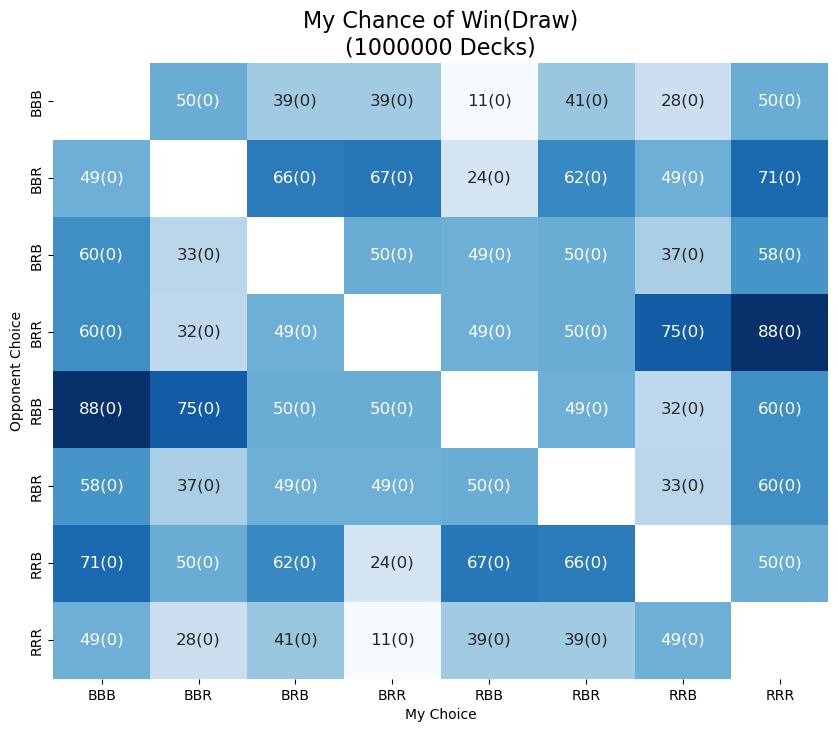

In [231]:
src.visualizations.generate_heatmap_from_df(df_tricks, decks_filename=filename_42, heatmap_filename='seed_42_tricks_heatmap.png')

##### *Total Cards*

Heatmap saved as figures/seed_42_total_cards_heatmap.png


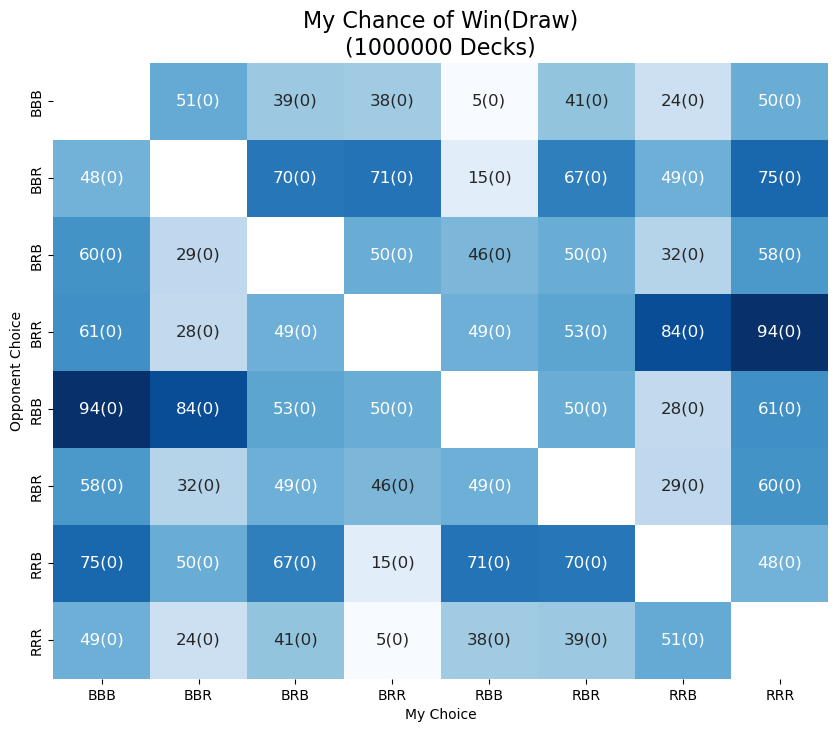

In [235]:
src.visualizations.generate_heatmap_from_df(df_total_cards, decks_filename=filename_42, heatmap_filename='seed_42_total_cards_heatmap.png')